In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Distribution of the Sample Average

(16.658155515370705, 39.480199851609314)

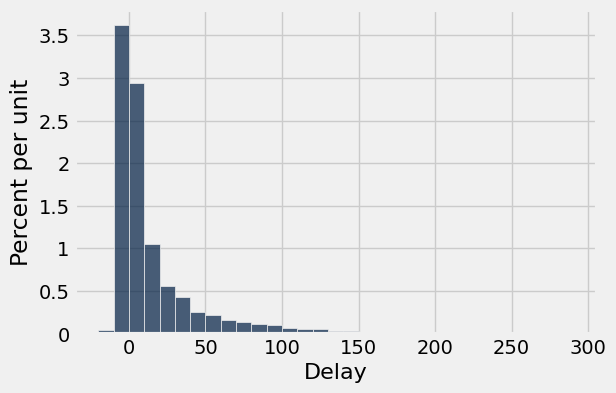

In [2]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)
delay_mean = np.average(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))
delay_mean,delay_sd

In [3]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [4]:
def ten_thousand_sample_means(sample_size):
    """Use the bootstrap to approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

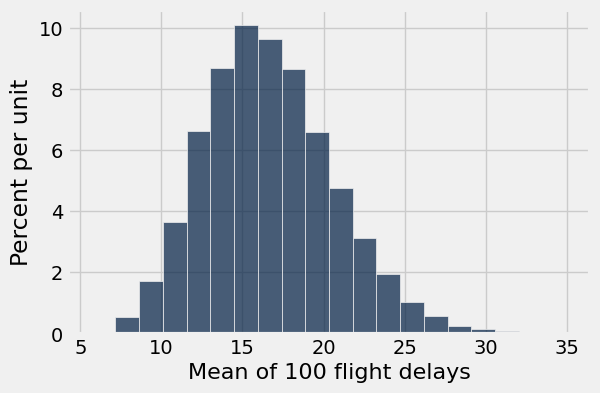

In [5]:
sample_means_100 = ten_thousand_sample_means(100)
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)

In [6]:
united.num_rows

13825

In [7]:
# How many possible sample means are there?
united.num_rows**100

1165504615418237494349615885011805820520566729506417030256012982835521101389289581506235141816629947536725096544602733133107053753073943300297773225614255185451716371701575964369001765160460588336757167411656514145375086808526538359315710549541088092844181050829772823311457655911418600856861473091769868254342788739800237506723607294430619482503424038624026101052634369335293806901887592175626195967197418212890625

## CLT: Center

Population Average: 16.6581555154
Average of sample means: 16.6567


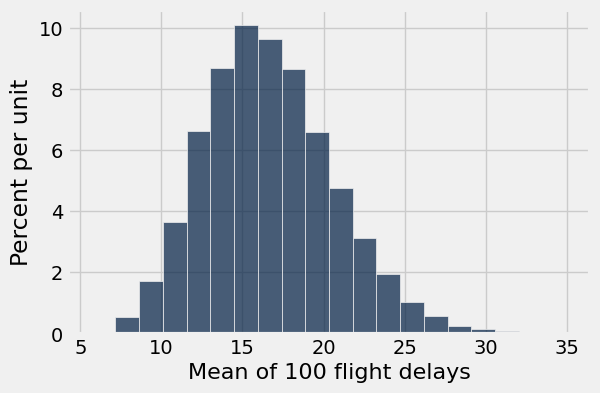

In [8]:
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)
print('Population Average:', delay_mean)
print('Average of sample means:', np.mean(sample_means_100))

## CLT: Spread

**Activity:** Compute 10000 sample means of sample size 400. What is the center (mean) of this distribution of means. How about the standard deviation?

Population Average: 16.6581555154


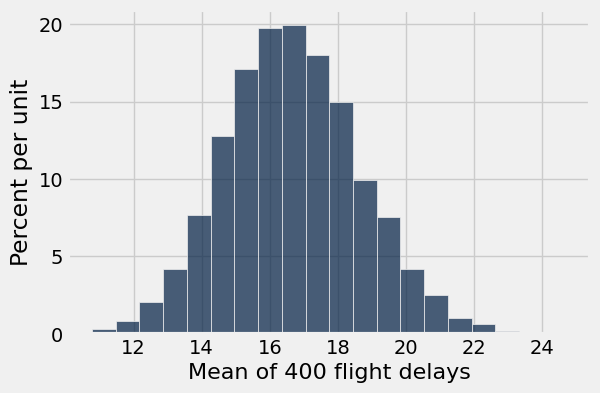

In [9]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', delay_mean)

In [11]:
np.mean(sample_means_100),np.std(sample_means_100)

(16.656700000000004, 3.9869154781610305)

In [10]:
np.mean(sample_means_400),np.std(sample_means_400)

(16.673133499999999, 1.9707212575419564)

**Discussion Question**: How does this distribution compare to the one from samples of size 100?

**Discussion Question**: How does do the mean and standard deviation of this distribution compare to the mean and standard deviation from the population?

**Activity:** Compute 10000 sample means of sample size 900. What is the center (mean) of this distribution of means. How about the standard deviation?

Population Average: 16.6581555154


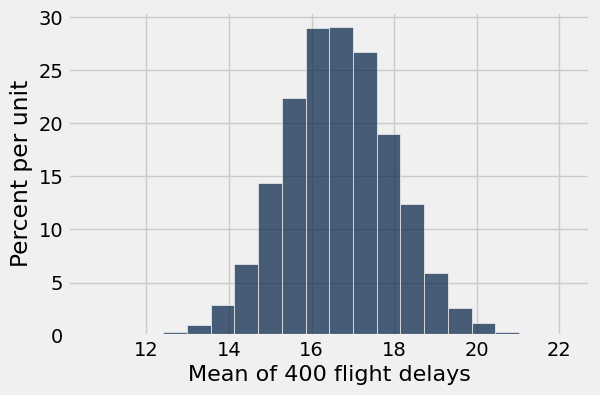

In [12]:
sample_means_900 = ten_thousand_sample_means(900)
Table().with_column(
    'Mean of 400 flight delays', sample_means_900).hist(bins=20)

print('Population Average:', delay_mean)

In [13]:
np.mean(sample_means_900),np.std(sample_means_900)

(16.654128333333333, 1.3159591916257825)

**Discussion Question:** How does this compare to the population, samples of size 100, and samples of size 400? Are you noticing any patterns? Do the same thing with samples of size 1600 if you are stuck.

In [14]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

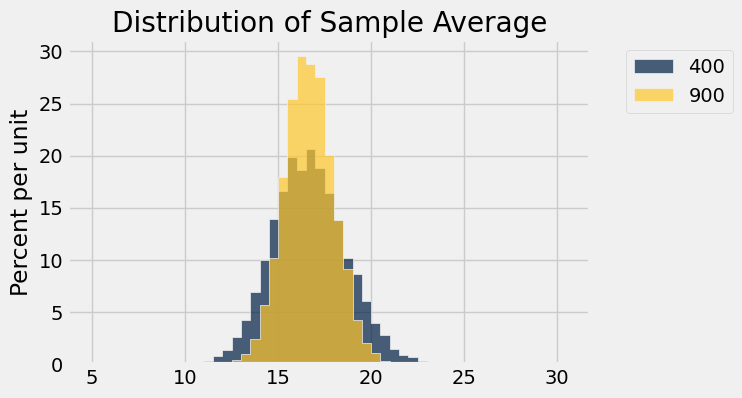

In [15]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

## Quantifying the Effect of Sample Size

In [ ]:
# Warning!!! This cell takes a long time to run! Don't run in class
sample_sizes = np.arange(100,950,50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds,np.std(sample_means)) 

In [ ]:
sd_table = Table().with_columns(
'Sample size',sample_sizes,
'SD of simulated sample means', sample_mean_sds,
'Pop SD /sqrt(sample size)',delay_sd/np.sqrt(sample_sizes))
sd_table.show()

In [ ]:
sd_table.scatter('Sample size')